In [1]:
import keras 
import tensorflow as tf
import keras.backend.tensorflow_backend as K
from PIL import Image
from imutils import paths
from os import path
from keras.optimizers import Adam,RMSprop
import pandas as pd
keras.__version__
IMAGE_DIMS = (375,250,3)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

In [3]:
date_arr = np.load('./new_date_arr.npy',allow_pickle=True)
test_arr = np.load('./new_test_date.npy',allow_pickle=True)
dust_arr = np.load('./ultra_PM_avg_31.npy',allow_pickle=True)
wind_arr = np.load('./wind_arr.npy',allow_pickle=True)
humi_arr = np.load('./humi_arr.npy',allow_pickle=True)



In [4]:
import time

new_date_arr = []
new_dust_arr = []
new_wind_arr = []
new_humi_arr = []

start = time.time() 
imagePaths = sorted(list(paths.list_images('./dataset/image')))
image_arr = []

for i in imagePaths:
    img_name = int(path.splitext(path.basename(i))[0])
    
    if img_name in date_arr :

        if img_name in test_arr:
            k = np.where(date_arr==img_name)[0][0]
            new_date_arr.append(date_arr[k])
            new_dust_arr.append(dust_arr[k])
            new_wind_arr.append(wind_arr[k])
            new_humi_arr.append(humi_arr[k])

            image = Image.open(i)
            image_crop = image.crop([380,0,600,200])
            image_crop = image_crop.resize((IMAGE_DIMS[0],IMAGE_DIMS[1]))
            image = image.resize((IMAGE_DIMS[0],IMAGE_DIMS[1]))
            image = np.concatenate((image_crop,image),axis=2)
            image = img_to_array(image)
            image_arr.append(image)
image_arr = np.array(image_arr, dtype="float") / 255.0    

print("[INFO] data matrix:  ({:.2f}MB)".format(image_arr.nbytes / (1024 * 1000.0)))


[INFO] data matrix:  (9808.59MB)


In [5]:
print(len(new_date_arr))
print(len(new_dust_arr))
print(len(new_wind_arr))
print(len(new_humi_arr))

print(len(image_arr))

2232
2232
2232
2232
2232


In [6]:
from sklearn.utils import shuffle

con_data_img = image_arr
con_data_val = new_dust_arr
con_data_wea = np.concatenate([np.array(new_wind_arr).reshape(len(new_wind_arr),1),
                                   np.array(new_humi_arr).reshape(len(new_humi_arr),1)], axis=1)

con_data_img, con_data_val, con_data_wea = shuffle(np.array(con_data_img), np.array(con_data_val), np.array(con_data_wea), random_state=0)



In [7]:
from keras.models import Model, Sequential
from keras.layers import Input, LSTM, GRU, Embedding
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

model= keras.models.load_model('lstm-roi-ultra-PM-200-31.model')
y_pred = np.squeeze(np.round(model.predict([con_data_img, con_data_wea]).astype(np.int64)))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [8]:
RMSE = mean_squared_error(con_data_val.astype(np.int64), y_pred)**0.5
R2SCORE = r2_score(con_data_val.astype(np.int64), y_pred)

print("RMSE 는 : " , RMSE)
print("R2SCORE 는 : ", R2SCORE)

RMSE 는 :  1.2583057392117916
R2SCORE 는 :  0.98153373563189


Text(70, 50, 'R-squared = 0.98')

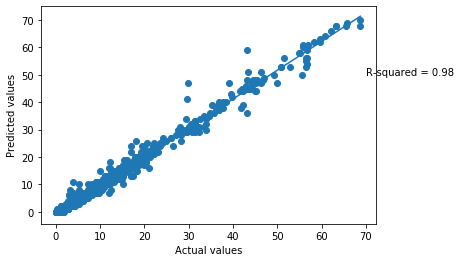

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

test_val=np.squeeze(con_data_val.astype(np.int64))

plt.scatter(con_data_val,y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(con_data_val), np.poly1d(np.polyfit(con_data_val, y_pred, 1))(np.unique(con_data_val)))

plt.text(70, 50, 'R-squared = %0.2f' % R2SCORE)

예측값 :  0
실제값 :  0.6774193548387096


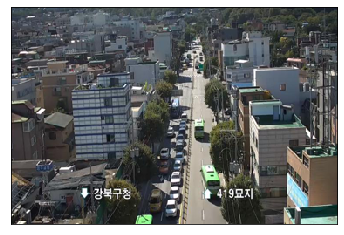

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
i=100

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])

예측값 :  3
실제값 :  3.5161290322580645


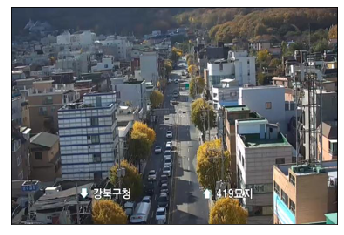

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
i=101

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])

예측값 :  6
실제값 :  7.032258064516129


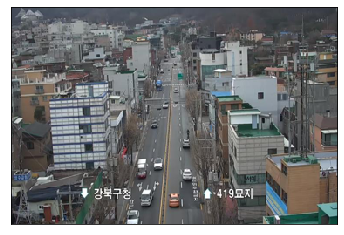

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
i=77

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])

In [39]:
np.where(con_data_val >40)


(array([  23,   61,   92,  155,  203,  204,  240,  247,  283,  329,  336,
         373,  427,  458,  492,  505,  556,  580,  595,  598,  648,  662,
         675,  688,  726,  805,  886, 1065, 1101, 1104, 1146, 1159, 1166,
        1187, 1257, 1280, 1392, 1406, 1467, 1482, 1532, 1563, 1600, 1652,
        1825, 1833, 1854, 1874, 1918, 1925, 2079, 2084, 2115, 2140, 2182],
       dtype=int64),)

예측값 :  59
실제값 :  56.645161290322584


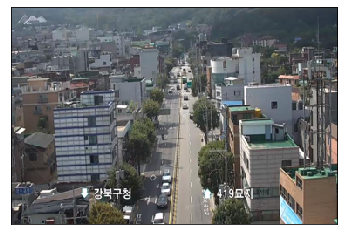

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
i=92

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])

예측값 :  61
실제값 :  56.83870967741935


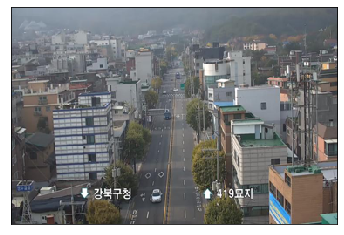

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
i=1854

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])

예측값 :  70
실제값 :  68.7741935483871


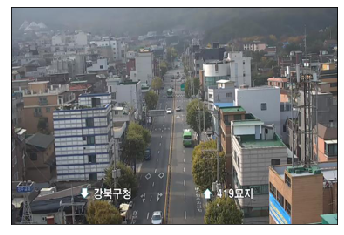

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
i=1833

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])

예측값 :  68
실제값 :  63.193548387096776


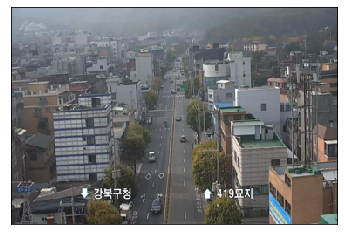

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
i=492

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])

예측값 :  5
실제값 :  6.096774193548387


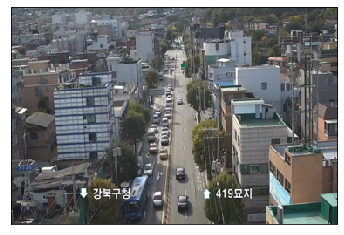

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
i=491

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])

예측값 :  8
실제값 :  8.483870967741936


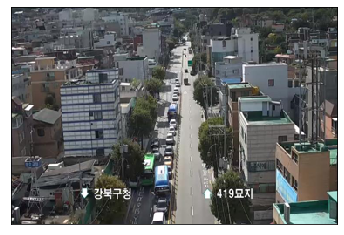

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
i=43

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])

예측값 :  41
실제값 :  29.70967741935484


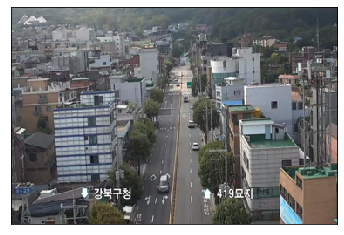

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
i=942

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])

예측값 :  22
실제값 :  22.29032258064516


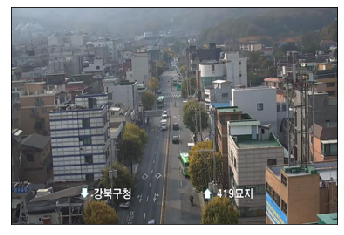

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
i=1592

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])

예측값 :  20
실제값 :  20.419354838709676


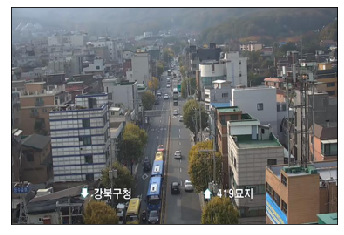

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
i=1326

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])

%matplotlib inline
import matplotlib.pyplot as plt
i=1670

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])

예측값 :  48
실제값 :  46.806451612903224


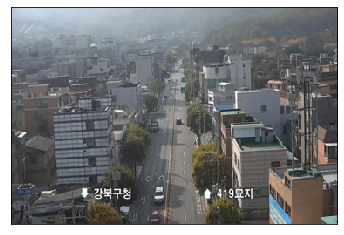

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
i=23

plt.imshow(con_data_img[i][:,:,3:])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
print("예측값 : ", y_pred[i])
print("실제값 : ", con_data_val[i])